# Задача выделения сообществ и метрики оценки качества

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.remove_edges_from.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.partition_quality.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html
* Дополнительные источники: 
   * https://arxiv.org/pdf/0906.0612.pdf

## Вопросы для совместного обсуждения

1\. Обсудите основные метрики для оценки качества выделенных сообществ и способы их вычисления.

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите сеть `Southern women` с сайта http://konect.cc/, удалите из него петли и создайте не менее 5 разбиений этой сети на 2 сообщества (часть разбиений должны частично или полностью соответствовать интуитивным представлениям о разбиении на сообщества, часть - нет). Для создания разбиений не используйте специализированные алгоритмы. Визуализируйте графы, раскрасив узлы в цвет соответствующего им сообщества.

In [1]:
import pandas as pd
import networkx as nx
import random

In [2]:
data=pd.read_csv('data/opsahl-southernwomen/out.opsahl-southernwomen', delimiter=' ', skiprows=2, names=['source', 'target'], index_col=False)
G=nx.from_pandas_edgelist(data)

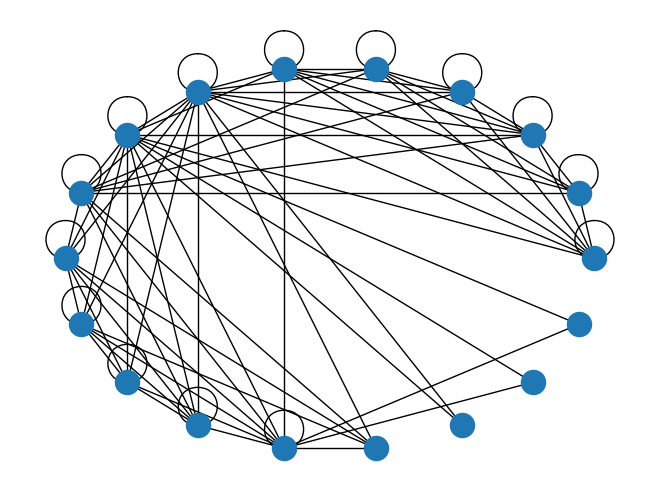

In [3]:
nx.draw(G, pos=nx.circular_layout(G))

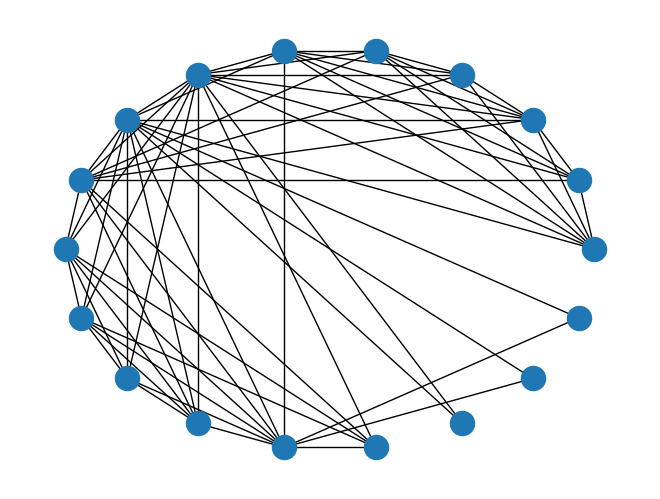

In [4]:
G.remove_edges_from(nx.selfloop_edges(G))
nx.draw(G, pos=nx.circular_layout(G))

In [5]:
G.degree()

DegreeView({1: 7, 2: 6, 3: 8, 4: 6, 5: 7, 6: 8, 7: 14, 8: 13, 9: 10, 10: 8, 11: 7, 12: 6, 13: 7, 14: 10, 15: 5, 16: 2, 17: 2, 18: 2})

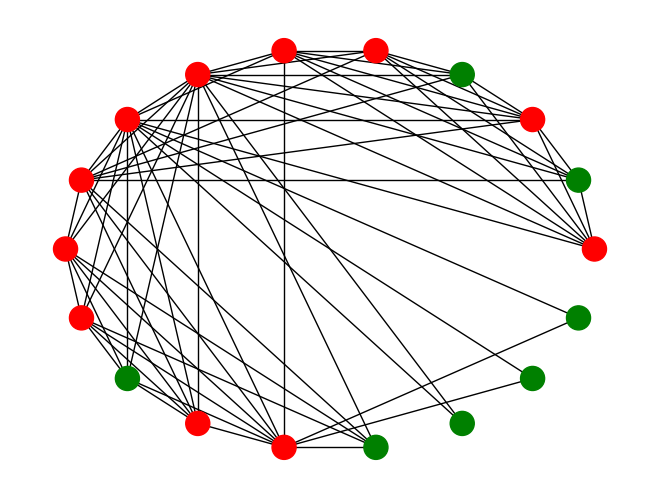

In [6]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if G.degree()[i]>6:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
pos = nx.circular_layout(G)

nx.draw(G, pos, node_color=node_color)

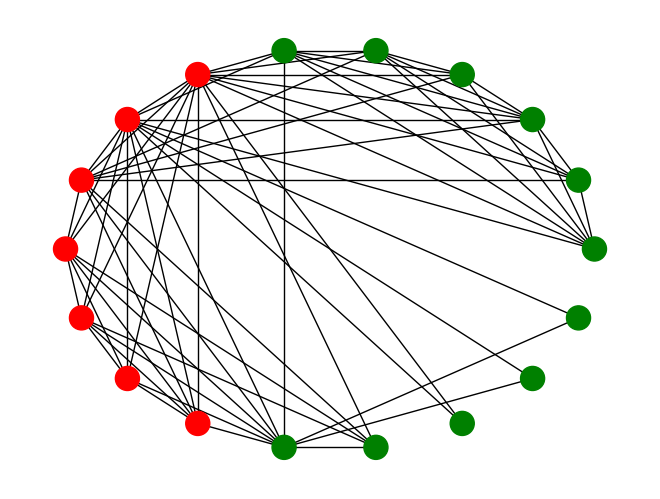

In [7]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i in [7, 8, 9, 10, 11, 12, 13]:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
pos = nx.circular_layout(G)

nx.draw(G, pos, node_color=node_color)

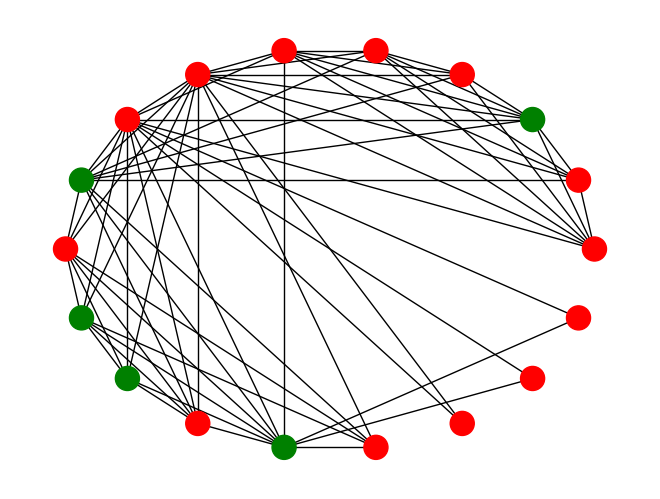

In [8]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if random.randint(0, 1)==0:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
pos = nx.circular_layout(G)

nx.draw(G, pos, node_color=node_color)

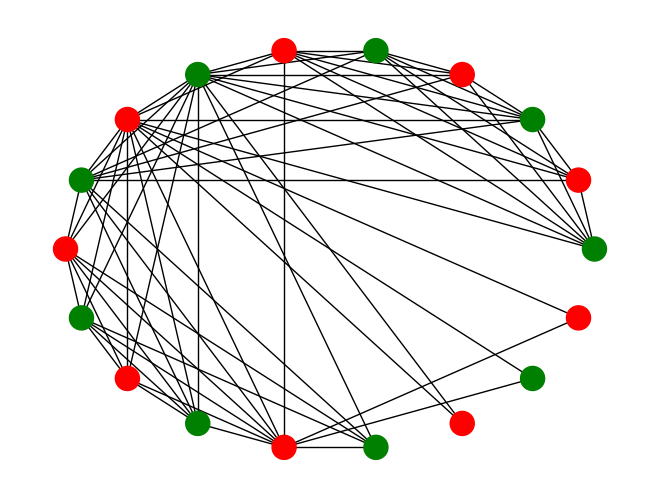

In [9]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i%2==0:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)

pos = nx.circular_layout(G)

nx.draw(G, pos, node_color=node_color)

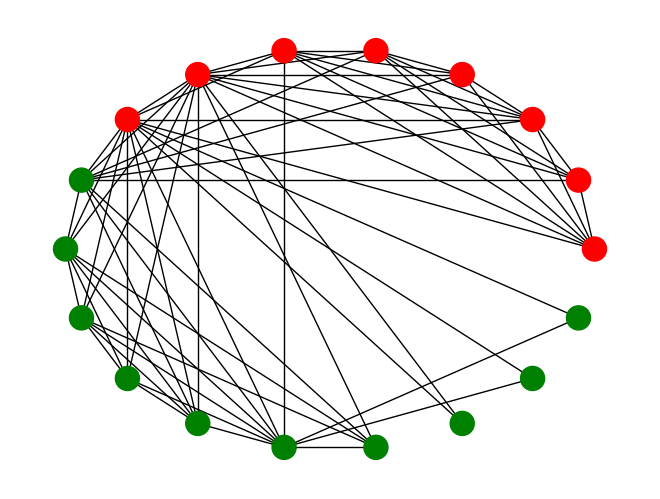

In [10]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i<9:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
pos = nx.circular_layout(G)

nx.draw(G, pos, node_color=node_color)

<p class="task" id="2"></p>

2\. Для разбиений из предыдущей задачи посчитайте три величины: плотность первого сообщества, плотность второго сообщества и среднюю плотность сообществ (округлите значения до сотых). Выведите результаты в следующем виде:

```
Разбиение i: x, y, z
```
где `x` - плотность первого сообщества, `y` - плотность второго сообщества, `z` - средняя плотность сообществ.

Посчитайте и выведите плотность сети без разбиения на сообществ:

```
Плотность сети: x
```


In [11]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if G.degree()[i]>6:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
pos = nx.circular_layout(G)

s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
den1=nx.density(s1)
den2= nx.density(s2)
avg_den = (den1 + den2)/2
print(f'Разбиение 1: {den1:.2f}, {den2:.2f}, {avg_den:.2f}')

Разбиение 1: 0.64, 0.00, 0.32


In [12]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i in [7, 8, 9, 10, 11, 12, 13]:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
den1=nx.density(s1)
den2= nx.density(s2)
avg_den = (den1 + den2)/2
print(f'Разбиение 1: {den1:.2f}, {den2:.2f}, {avg_den:.2f}')

Разбиение 1: 0.90, 0.33, 0.62


In [13]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if random.randint(0, 1)==0:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
den1=nx.density(s1)
den2= nx.density(s2)
avg_den = (den1 + den2)/2
print(f'Разбиение 1: {den1:.2f}, {den2:.2f}, {avg_den:.2f}')

Разбиение 1: 0.19, 0.47, 0.33


In [14]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i%2==0:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
den1=nx.density(s1)
den2= nx.density(s2)
avg_den = (den1 + den2)/2
print(f'Разбиение 1: {den1:.2f}, {den2:.2f}, {avg_den:.2f}')

Разбиение 1: 0.36, 0.44, 0.40


In [15]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i<9:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
        
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
den1=nx.density(s1)
den2= nx.density(s2)
avg_den = (den1 + den2)/2
print(f'Разбиение 1: {den1:.2f}, {den2:.2f}, {avg_den:.2f}')

Разбиение 1: 0.86, 0.42, 0.64


In [16]:
print(f'Плотность сети: {nx.density(G):.2f}')

Плотность сети: 0.42


<p class="task" id="3"></p>

3\. Для разбиений из первой задачи посчитайте модулярность (округлите значения до сотых). Выведите результаты в следующем виде:

```
Разбиение i: x
```
где `x` - мера модулярности для разбиения `i`.

Посчитайте и выведите модулярность в случае разделения узлов на одно сообщество:

```
Модулярность разбиения с одним сообществом: x
```

In [17]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if G.degree()[i]>6:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
pos = nx.circular_layout(G)

s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
print(f'Разбиение 1: {nx.community.modularity(G, [s1, s2]):.2f}')

Разбиение 1: -0.10


In [18]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i in [7, 8, 9, 10, 11, 12, 13]:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
print(f'Разбиение 2: {nx.community.modularity(G, [s1, s2]):.2f}')

Разбиение 2: 0.08


In [19]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if random.randint(0, 1)==0:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
print(f'Разбиение 3: {nx.community.modularity(G, [s1, s2]):.2f}')

Разбиение 3: -0.06


In [20]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i%2==0:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
print(f'Разбиение 4: {nx.community.modularity(G, [s1, s2]):.2f}')

Разбиение 4: -0.05


In [21]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i<9:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
        
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
print(f'Разбиение 5: {nx.community.modularity(G, [s1, s2]):.2f}')

Разбиение 5: 0.17


In [22]:
print(f'Модулярность разбиения с одним сообществом: {nx.community.modularity(G, [G]):.2f}')

Модулярность разбиения с одним сообществом: 0.00


<p class="task" id="4"></p>

4\. Для разбиений из первой задачи посчитайте метрики покрытия (coverage) и эффективности (performance). (округлите значения до сотых). Выведите результаты в следующей виде:

```
Разбиение i: x, y
```
где `x` - значение метрики покрытия для разбиения `i`, `y` - значение метрики эффективности для разбиения `i`.


In [23]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if G.degree()[i]>6:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
pos = nx.circular_layout(G)

s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
print(f'Разбиение 1: {nx.community.partition_quality(G, [s1, s2])[0]:.2f}, {nx.community.partition_quality(G, [s1, s2])[1]:.2f}')

Разбиение 1: 0.55, 0.54


In [24]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i in [7, 8, 9, 10, 11, 12, 13]:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
print(f'Разбиение 1: {nx.community.partition_quality(G, [s1, s2])[0]:.2f}, {nx.community.partition_quality(G, [s1, s2])[1]:.2f}')

Разбиение 1: 0.58, 0.57


In [25]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if random.randint(0, 1)==0:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
print(f'Разбиение 1: {nx.community.partition_quality(G, [s1, s2])[0]:.2f}, {nx.community.partition_quality(G, [s1, s2])[1]:.2f}')

Разбиение 1: 0.52, 0.52


In [26]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i%2==0:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
print(f'Разбиение 1: {nx.community.partition_quality(G, [s1, s2])[0]:.2f}, {nx.community.partition_quality(G, [s1, s2])[1]:.2f}')

Разбиение 1: 0.45, 0.49


In [27]:
node_color=[]
sub1, sub2 = [], []
for i in G.nodes():
    if i<9:
        node_color.append('red')
        sub1.append(i)
    else:
        node_color.append('green')
        sub2.append(i)
        
s1=G.subgraph(sub1)
s2=G.subgraph(sub2)
print(f'Разбиение 1: {nx.community.partition_quality(G, [s1, s2])[0]:.2f}, {nx.community.partition_quality(G, [s1, s2])[1]:.2f}')

Разбиение 1: 0.67, 0.67


<p class="task" id="5"></p>

5\. Вычислите значение центральности по посредничеству для всех узлов сети. Выделите множество узлов $C_0$, центральность по посредничеству для которых строго больше, чем среднее значение центральности для всех узлов графа. Удалите узлы множества $C_0$ из графа и выделите компоненты связности $C_1, ...C_k$. Выведите полученные компоненты связности на экран.

Восстановите исходный граф со всеми узлами. Трактуя множества $C_0, ... C_k$ как сообщества, посчитайте значения модулярности, покрытия и эффективности для такого разбиения. Выведите полученные значения на экран.

Визуализируйте граф, раскрасив узлы в цвет сообществующего им сообщества.


In [28]:
import numpy as np

In [29]:
betweenness_centrality = nx.betweenness_centrality(G)
mean_betweenness_centrality = np.mean(list(betweenness_centrality.values()))


In [52]:
C0 = [node for node, centrality in betweenness_centrality.items() if centrality > mean_betweenness_centrality]
print(C0)
graph_without_C0 = G.copy()
g=graph_without_C0.remove_nodes_from(C0)

[7, 8, 9, 14]


In [31]:
components = nx.connected_components(graph_without_C0)
original_graph = G.copy()
comp=list(components)
print(comp)

[{1, 2, 3, 4, 5, 6}, {10, 11, 12, 13, 15}, {16}, {17}, {18}]


In [32]:
comp.append(set(C0))
print(comp)
Q = nx.algorithms.community.modularity(original_graph, comp)
print(Q)

[{1, 2, 3, 4, 5, 6}, {10, 11, 12, 13, 15}, {16}, {17}, {18}, {8, 9, 14, 7}]
0.1121826171875


In [33]:
coverage = nx.community.partition_quality(G, comp)[0]
coverage

0.421875

In [34]:
efficiency = nx.community.partition_quality(G, comp)[1]
efficiency

0.7320261437908496

In [45]:
comp[0:-1]

[{1, 2, 3, 4, 5, 6}, {10, 11, 12, 13, 15}, {16}, {17}, {18}]

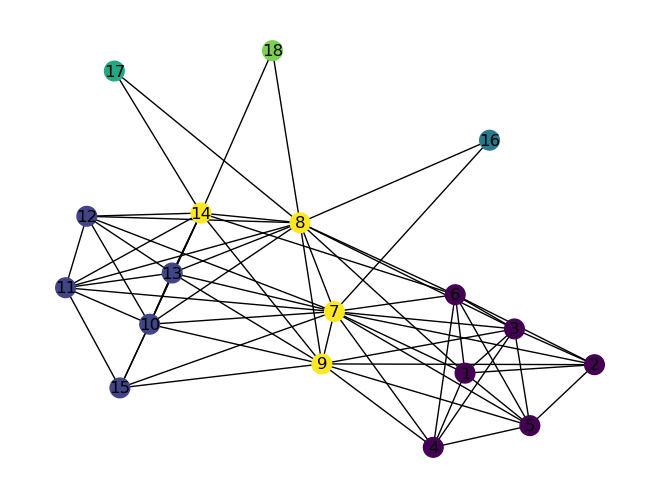

In [55]:
colors = [0] * (G.number_of_nodes())
for i, component in enumerate(comp):
    for node in component:
        colors[node-1] = i*100

nx.draw(G, node_size=200, pos=nx.spring_layout(G) ,node_color=colors, with_labels=True)

In [65]:
# colors = [0] * (G.number_of_nodes())
# for i, component in enumerate(comp[0:-1]):
#     for node in component:
#         colors[node-1] = i*100

# nx.draw(graph_without_C0, node_size=200, pos=nx.spring_layout(G) ,node_color=colors, with_labels=True)

5.1 Для сети Карате клуб вычислите меры центральности: по степени, по посредничеству, по близости и по собственному вектору. Визуализируйте центральность узлов с помощью размера и цвета узлов (сохраняя расположение узлов на всех визуализациях).

In [37]:
G=nx.karate_club_graph()

In [38]:
nx.degree_centrality(G), nx.closeness_centrality(G), nx.eigenvector_centrality(G)

({0: 0.48484848484848486,
  1: 0.2727272727272727,
  2: 0.30303030303030304,
  3: 0.18181818181818182,
  4: 0.09090909090909091,
  5: 0.12121212121212122,
  6: 0.12121212121212122,
  7: 0.12121212121212122,
  8: 0.15151515151515152,
  9: 0.06060606060606061,
  10: 0.09090909090909091,
  11: 0.030303030303030304,
  12: 0.06060606060606061,
  13: 0.15151515151515152,
  14: 0.06060606060606061,
  15: 0.06060606060606061,
  16: 0.06060606060606061,
  17: 0.06060606060606061,
  18: 0.06060606060606061,
  19: 0.09090909090909091,
  20: 0.06060606060606061,
  21: 0.06060606060606061,
  22: 0.06060606060606061,
  23: 0.15151515151515152,
  24: 0.09090909090909091,
  25: 0.09090909090909091,
  26: 0.06060606060606061,
  27: 0.12121212121212122,
  28: 0.09090909090909091,
  29: 0.12121212121212122,
  30: 0.12121212121212122,
  31: 0.18181818181818182,
  32: 0.36363636363636365,
  33: 0.5151515151515151},
 {0: 0.5689655172413793,
  1: 0.4852941176470588,
  2: 0.559322033898305,
  3: 0.46478873239